# ENCUESTA DE CURSADA
## Primer Cuatrimestre de 2018
### Departamento de Computación FIUBA

In [152]:
import numpy as np 
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

In [153]:
comp = pd.read_csv('encuesta4.csv')
comp.sample(1)

Timestamp                                 Curso  \
362  2018/07/09 5:04:53 PM GMT-3  Algoritmos y Programación 1 - Guarna   

    Opinión General Sobre el Curso ¿Aprobó la Cursada?  \
362  Regular                        Sí                   

    ¿Cómo te Resultaron los Temas de la Materia?  \
362  Interesantes                                  

    ¿Los Temas de la Materia Están Actualizados?  \
362  Sí                                            

    Nivel de las Clases Teóricas del Curso  \
362  Regulares                               

    Nivel de las Clases Prácticas del Curso Dificultad del Curso  \
362  Regulares                               Facil                 

    Dificultad del TP Comentarios Sobre el Curso  
362  Normal            NaN

#### Total de Encuestas Procesadas

In [154]:
print(len(comp))

834


In [155]:
# This not used :)
filter = (comp["Comentarios Sobre el Curso"].notnull())
opinions = comp.loc[filter,['Curso','Comentarios Sobre el Curso']].sort_values('Curso')

In [156]:
def map_answers(comp):
    map_sino = {'Sí':5,'No':1}
    map_opinion = {'Excelente':5,'Muy Bueno':4, 'Bueno':3,'Regular':2,'Malo':1}
    map_temas = {'Interesantes':4,'Muy Interesantes':5, 'Poco Interesantes':2,'Nada Interesantes':1}
    map_clases_teoricas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No hay clases teóricas':np.NaN}
    map_dificultad_tp = {'Muy dificil':5,'Dificil':4,'Normal':3,'Fácil':2,'Muy Fácil':1, 'No hay TP': np.NaN}
    map_dificultad = {'Muy Dificil':5,'Dificil':4,'Normal':3,'Facil':2,'Muy Facil':1, 'No hay TP': np.NaN}
    map_clases_practicas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No Hay Clases Prácticas':np.NaN}
    comp.replace({"¿Aprobó la Cursada?": map_sino},inplace=True)
    comp.replace({"¿Los Temas de la Materia Están Actualizados?": map_sino},inplace=True)
    comp.replace({"Opinión General Sobre el Curso": map_opinion},inplace=True)
    comp.replace({"Nivel de las Clases Teóricas del Curso": map_clases_teoricas},inplace=True)
    comp.replace({"Nivel de las Clases Prácticas del Curso": map_clases_practicas},inplace=True)
    comp.replace({"Dificultad del Curso": map_dificultad},inplace=True)
    comp.replace({"Dificultad del TP": map_dificultad_tp},inplace=True)
    comp.replace({"¿Cómo te Resultaron los Temas de la Materia?": map_temas},inplace=True)
    return comp

In [157]:
comp = map_answers(comp)

## Histograma de calificaciones para la opinión general sobre el curso


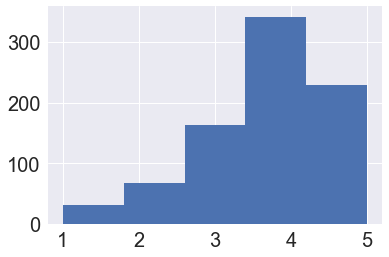

In [158]:
comp['Opinión General Sobre el Curso'].hist(bins=5);

In [159]:
grouped = comp.groupby('Curso')
num_votes = grouped.agg('size')
g_mean = grouped.mean()
g_mean['votes']=num_votes

## Varianza de la Opinión por Curso
Este gráfico muestra la variabilidad de la pregunta "Opinión General Sobre el Curso", a menor valor mas consistentes los resultados de la encuesta. Los valores mayores muestran disparidad de resultados en cuanto a la opinión general sobre el curso.

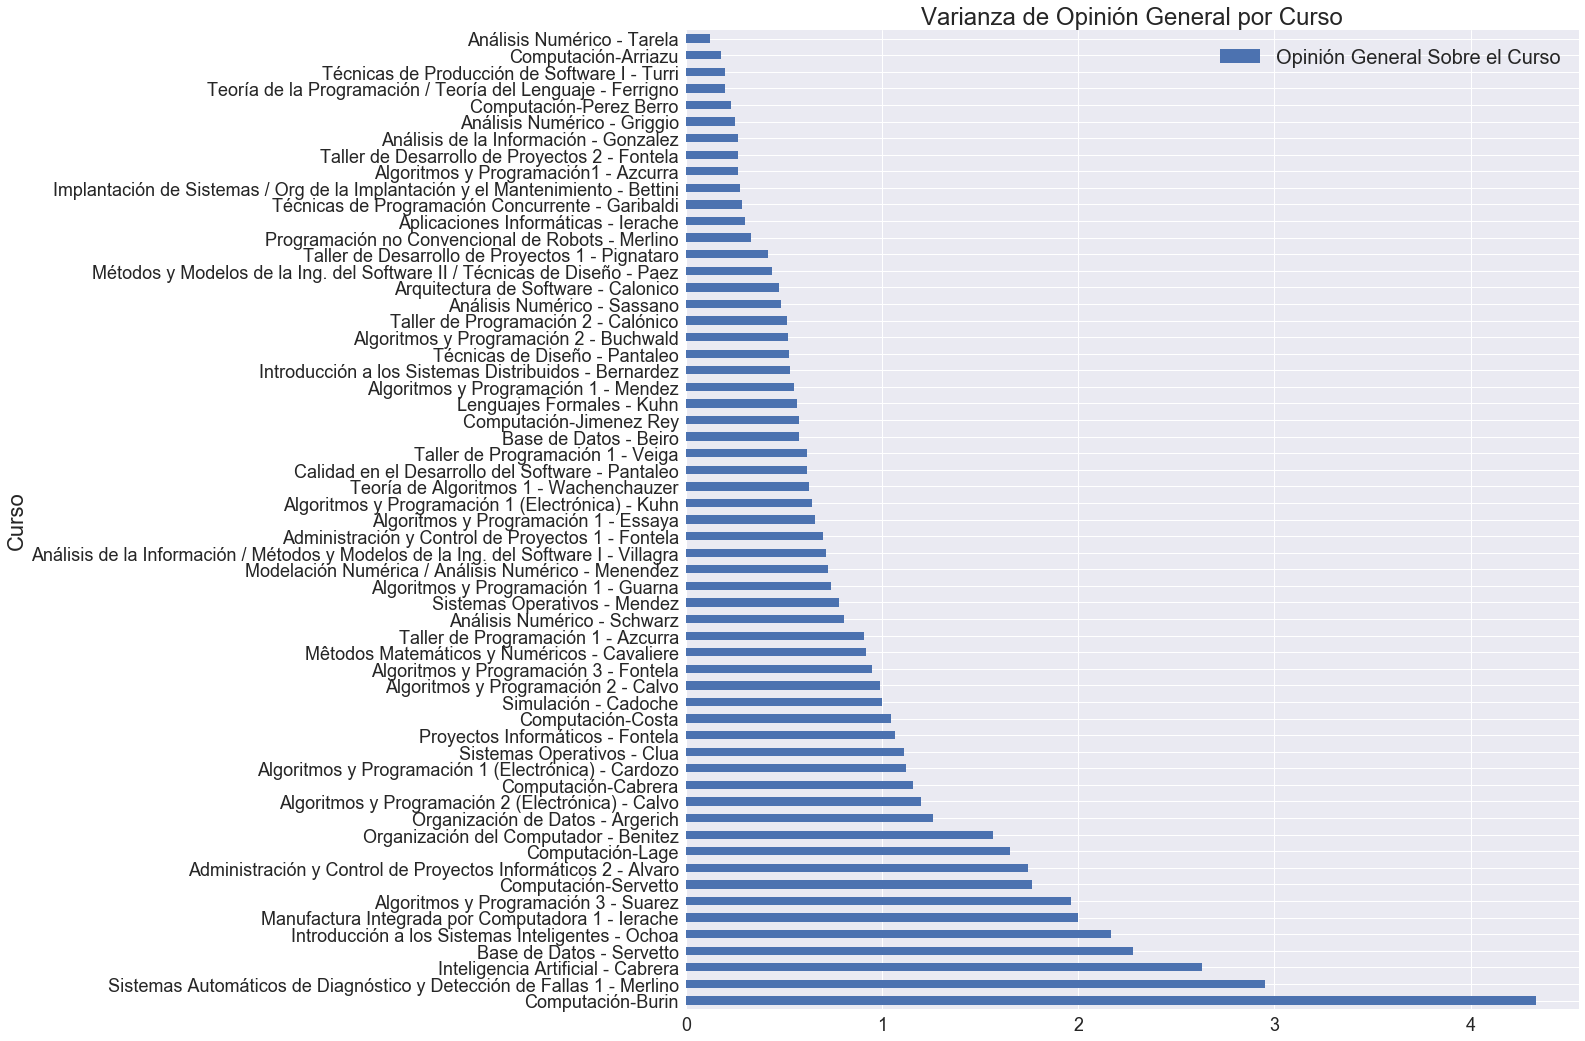

In [160]:
g_var = grouped.var()
gop = g_var.loc[g_var['Opinión General Sobre el Curso']>0,['Opinión General Sobre el Curso']].\
    sort_values(by='Opinión General Sobre el Curso',ascending=False).\
    plot(kind='barh',figsize=(16,18),title='Varianza de Opinión General por Curso',fontsize=18);

## Cantidad de Encuestados por Curso
Cantidad de encuestas completadas por cada Curso.

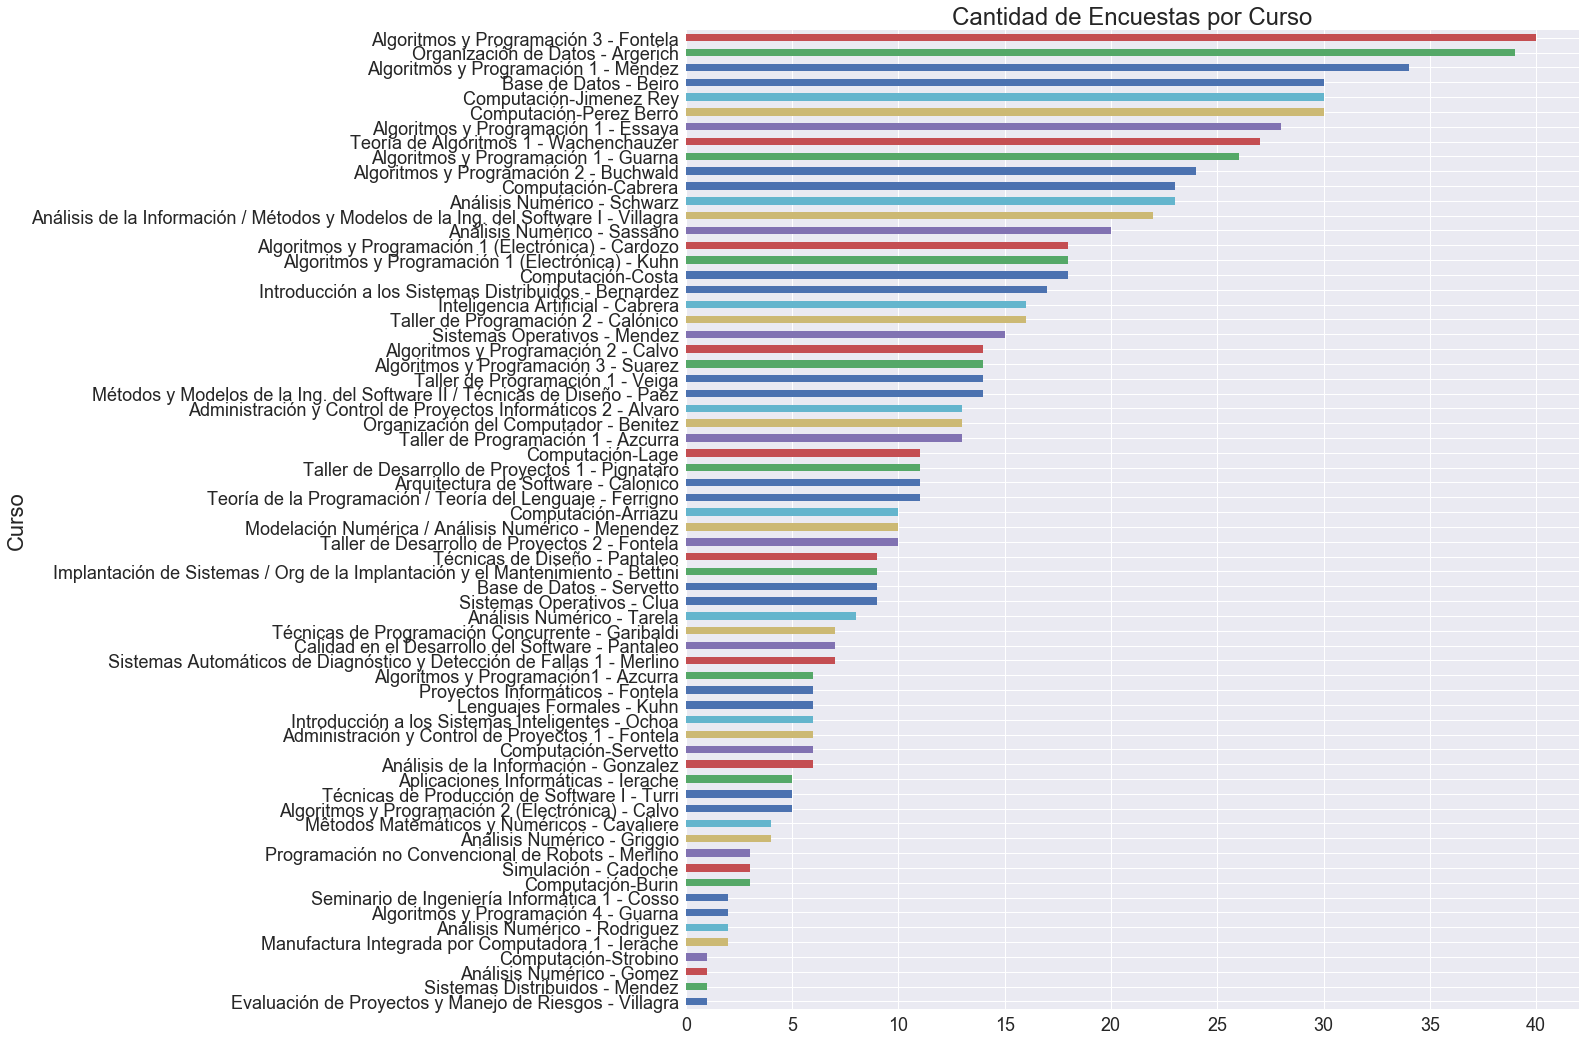

In [161]:
g_mean['votes'].sort_values(ascending=True).plot(kind='barh',figsize=(16,18),title='Cantidad de Encuestas por Curso',fontsize=18);

In [162]:
# Quedarnos unicamente con los cursos que tienen 3 o mas encuestas
g_mean = g_mean.loc[g_mean['votes']>2,:]
lista_cursos = g_mean.index.tolist()

## Heatmap de Evaluación de Cursos (5 o mas respuestas)
Esta matriz muestra el promedio de calificaciones para cada pregunta de la encuesta para los cursos que tienen 5 o mas encuestas. Orden alfabético por curso.

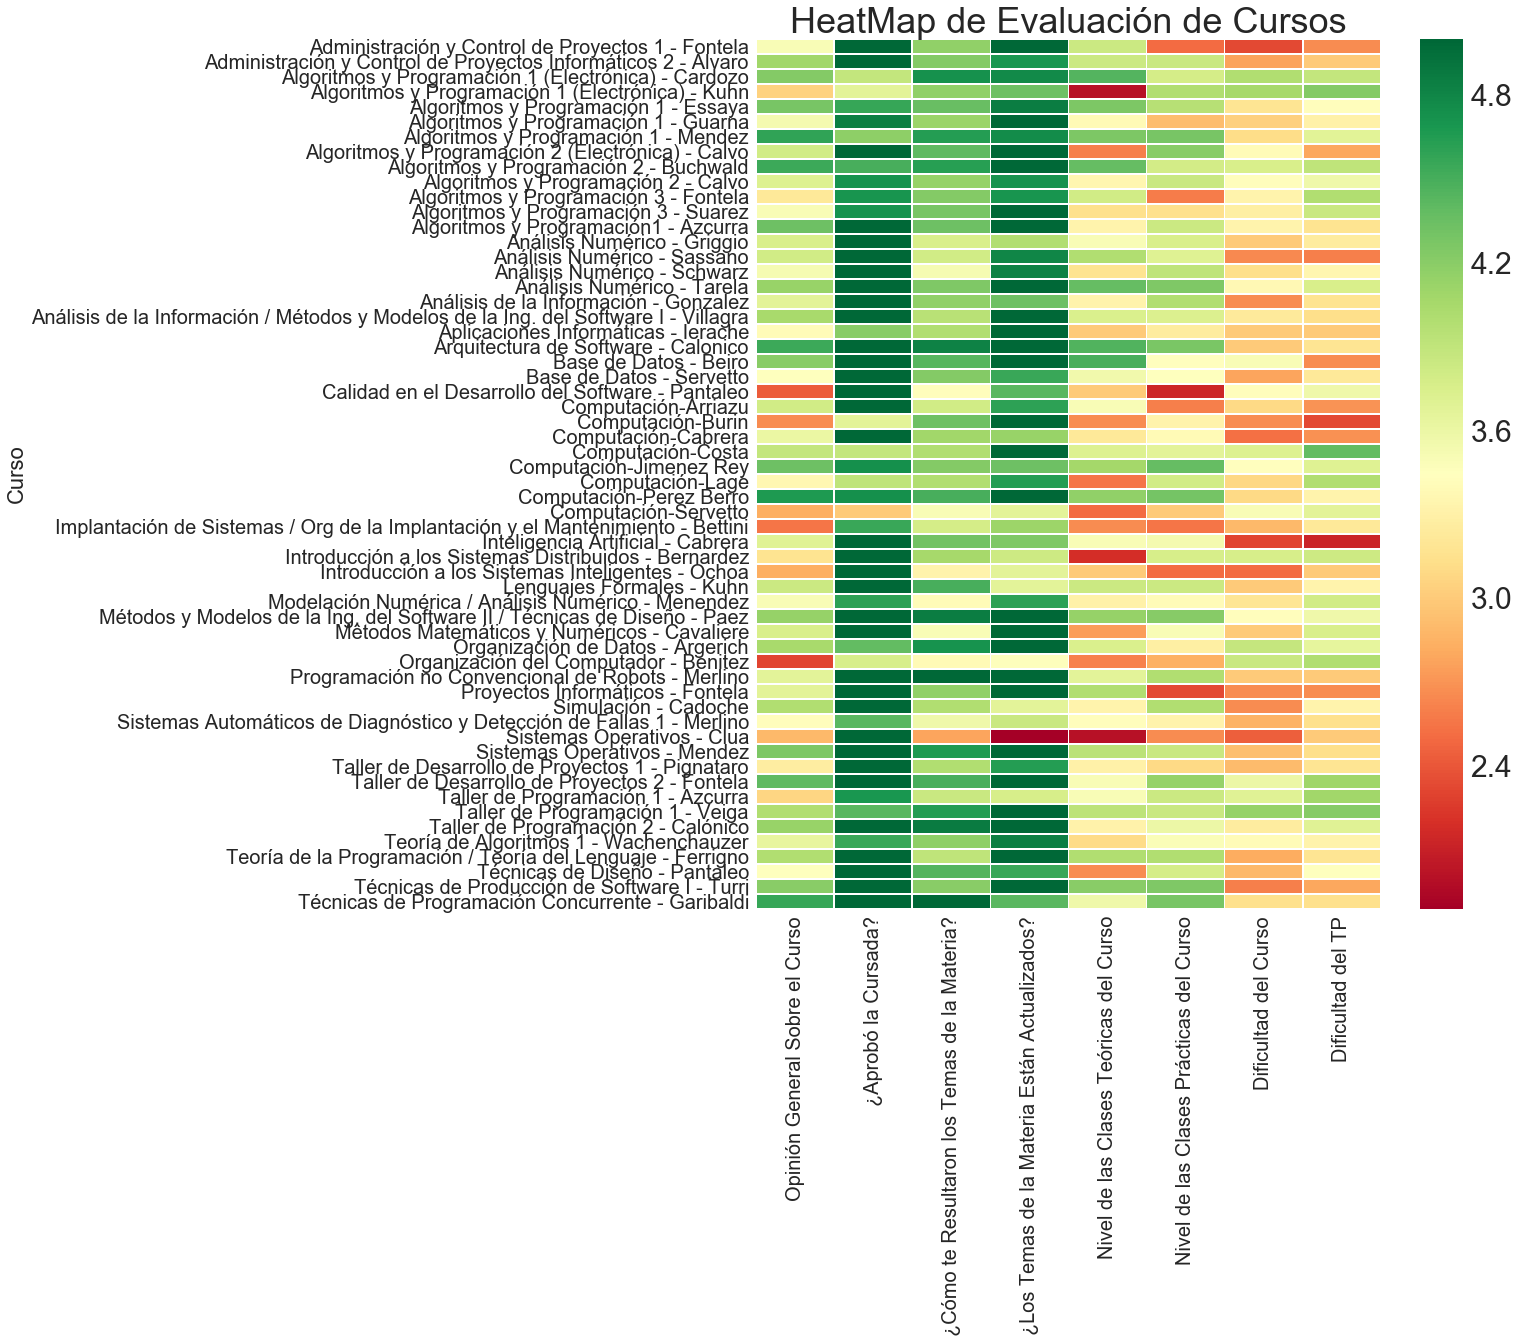

In [163]:
g_mean2 = g_mean.drop('votes',1)
fig, ax = plt.subplots(figsize=(14,16))        
sns.set(font_scale=3.0)
sns.heatmap(g_mean2, annot=False, linewidths=.5,cmap='RdYlGn',  ax=ax);
plt.title('HeatMap de Evaluación de Cursos');

## Histograma del Promedio de Opiniones de los Cursos (un promedio x curso)
Por cada curso se calcula el promedio de la pregunta "Opinión general sobre el curso" y luego se hace un histograma de los resultados. El gráfico solo incluye aquellos cursos con 5 o mas encuestas.

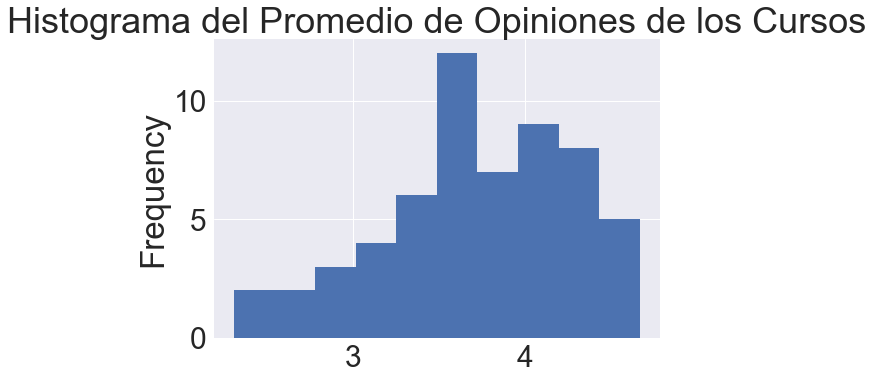

In [164]:
g_mean['Opinión General Sobre el Curso'].plot(kind='hist',bins=10,title='Histograma del Promedio de Opiniones de los Cursos');

## Opinion General Sobre el Curso

In [165]:
CUTLIST = [0,2,3,3.5,4.5,5]
LABELSLIST = ['r','orange','y','g', 'b']

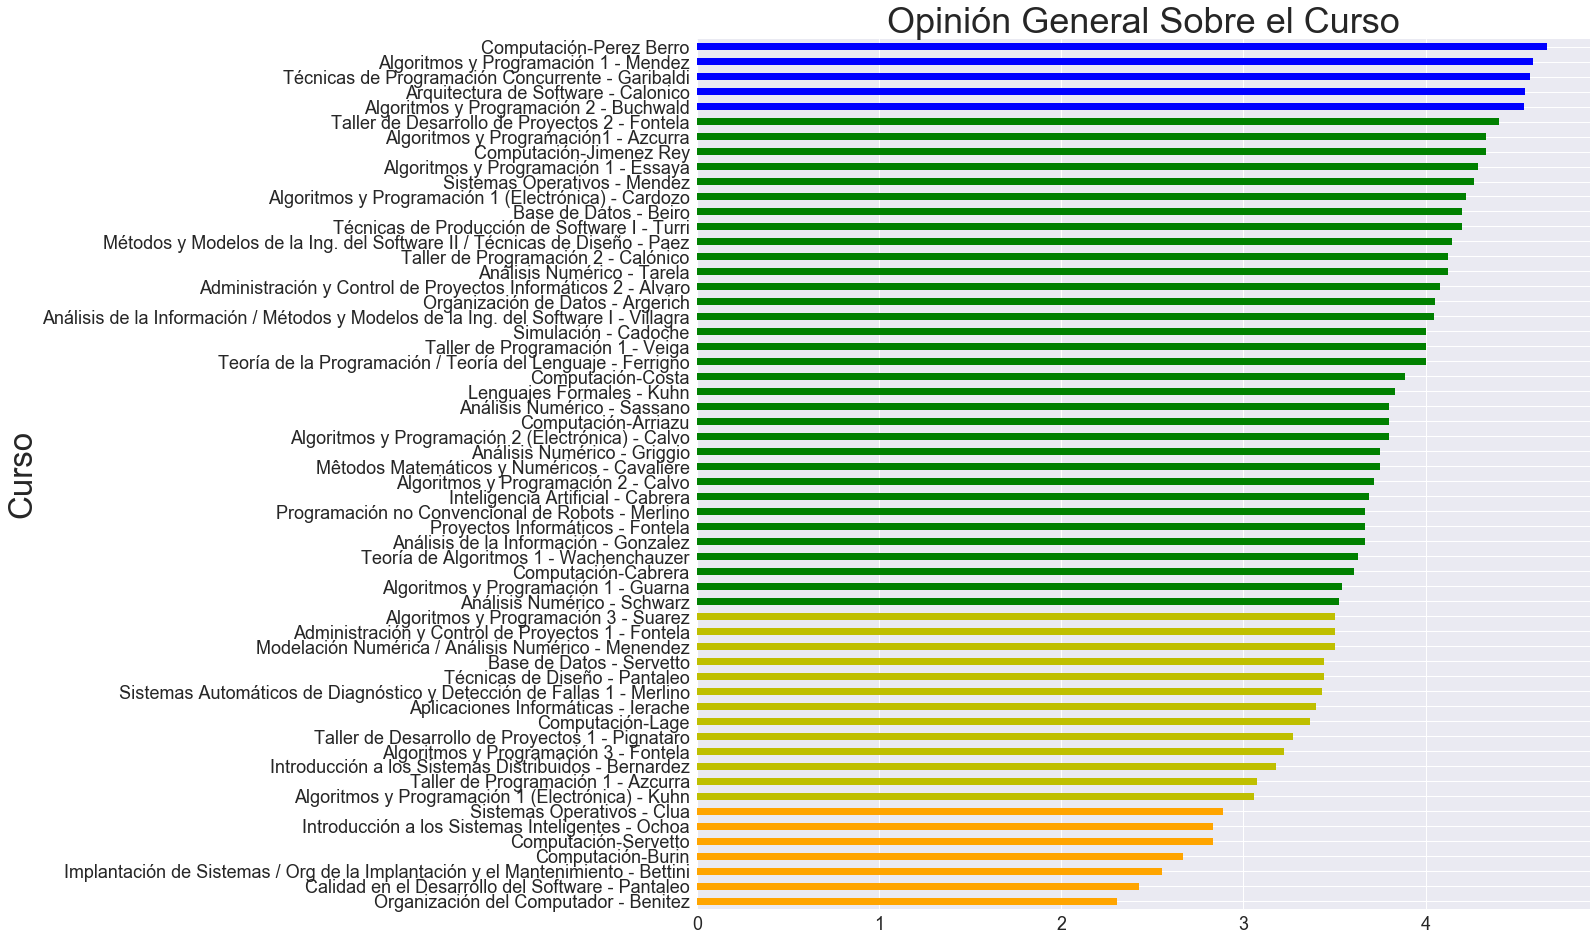

In [166]:
VARIABLE = 'Opinión General Sobre el Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## ¿Los Temas de la Materia son Interesantes?

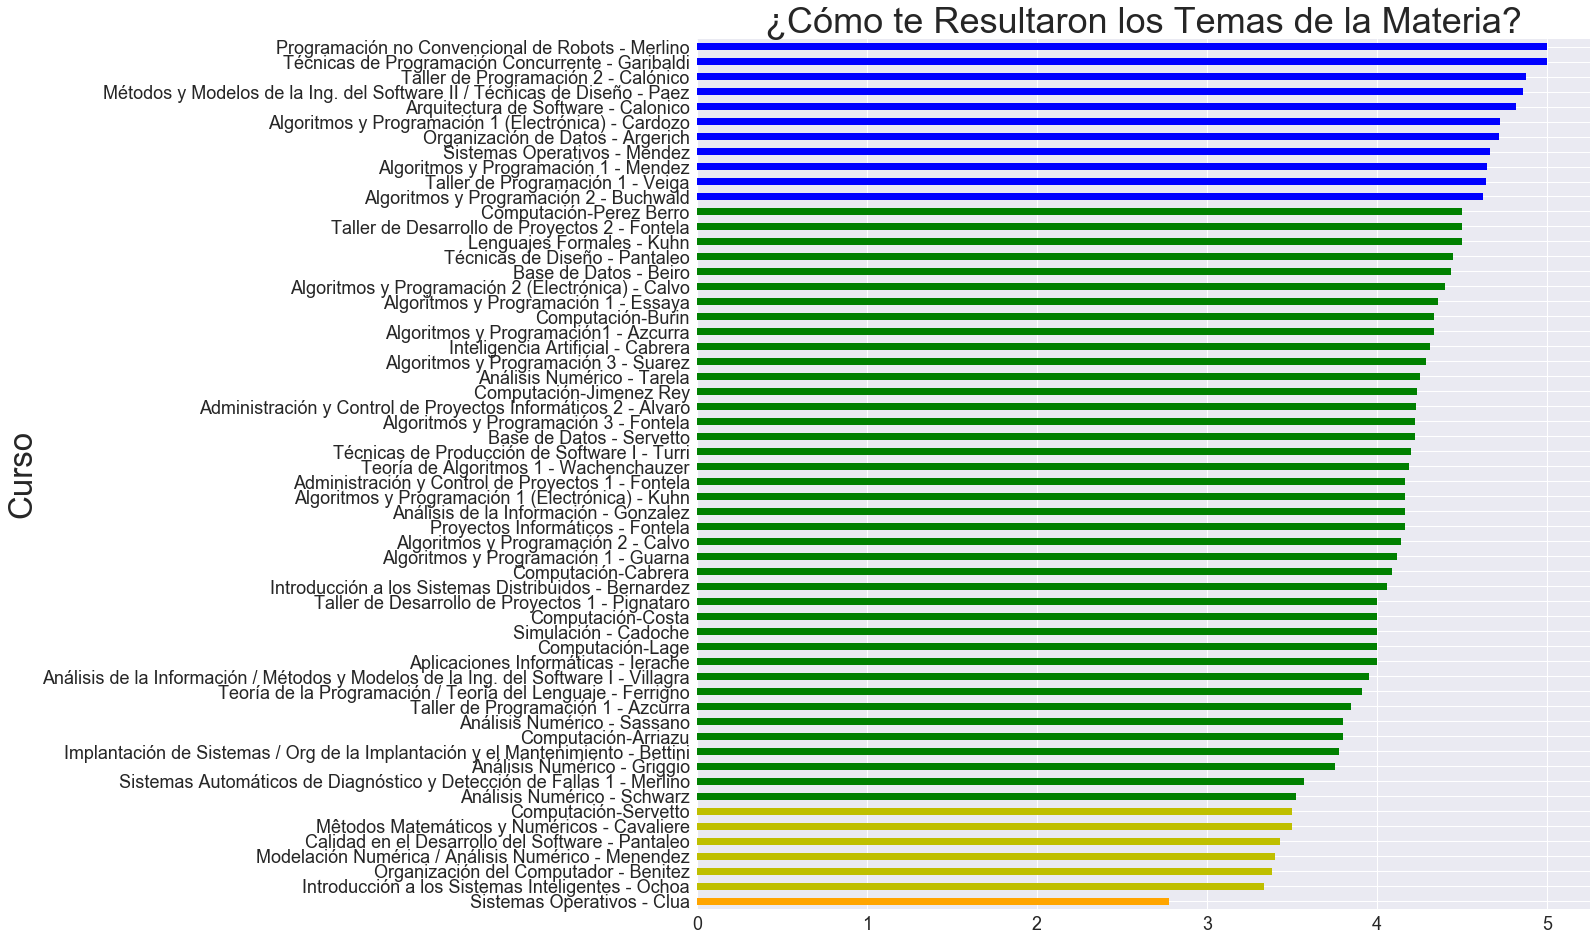

In [167]:
VARIABLE = '¿Cómo te Resultaron los Temas de la Materia?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors= pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## ¿Los Temas Están Actualizados?

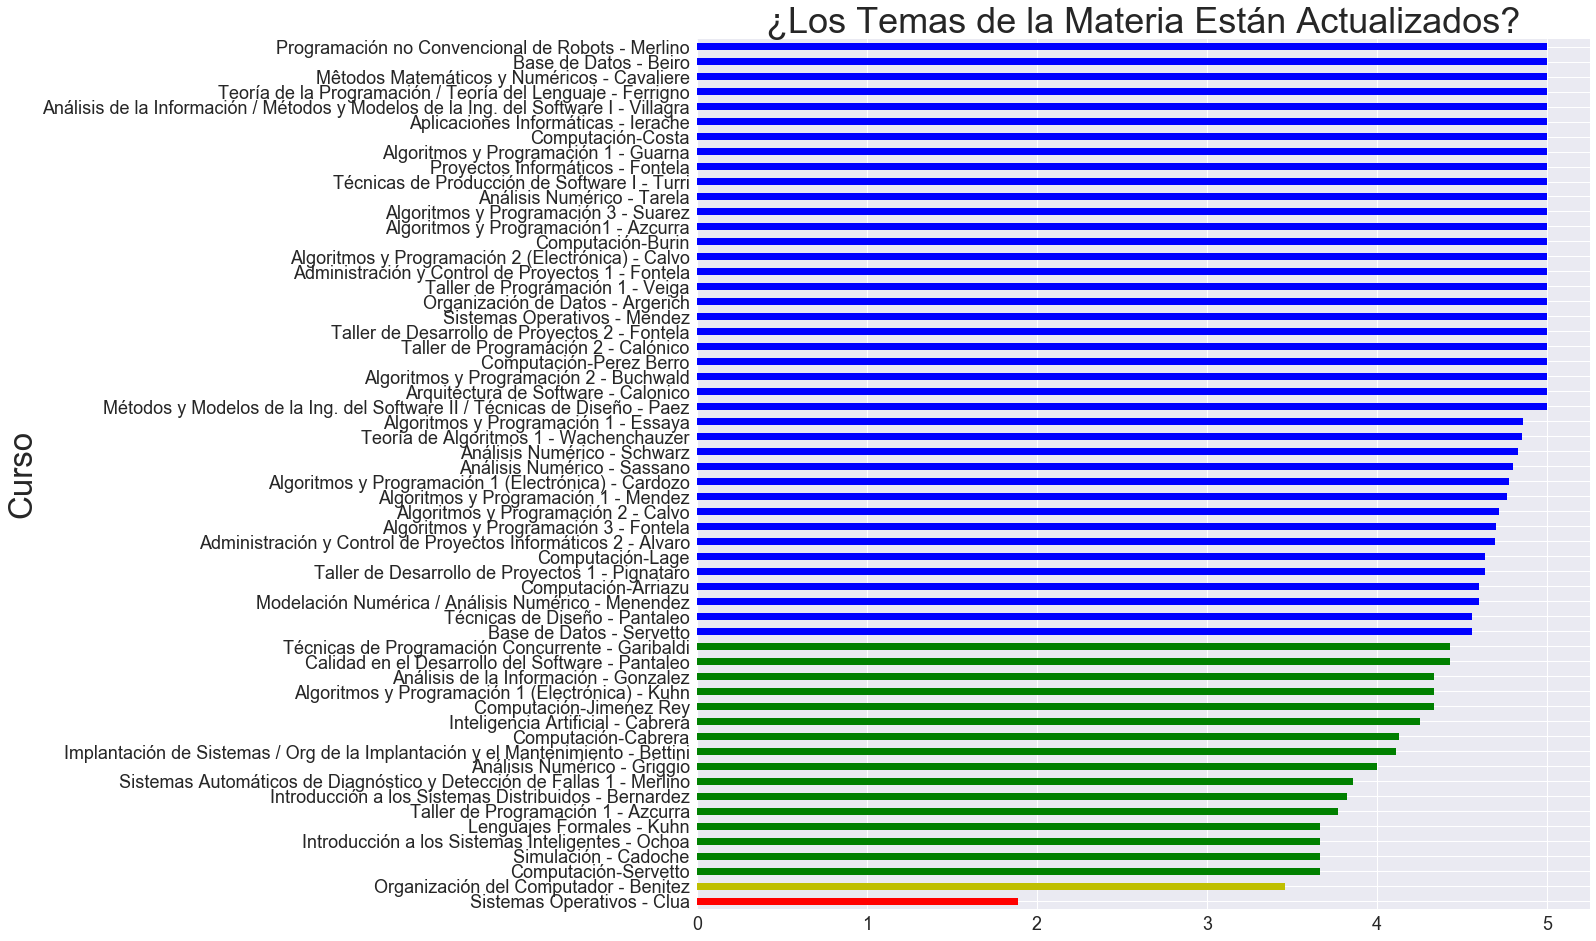

In [168]:
VARIABLE = '¿Los Temas de la Materia Están Actualizados?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Nivel de las Clases Teóricas

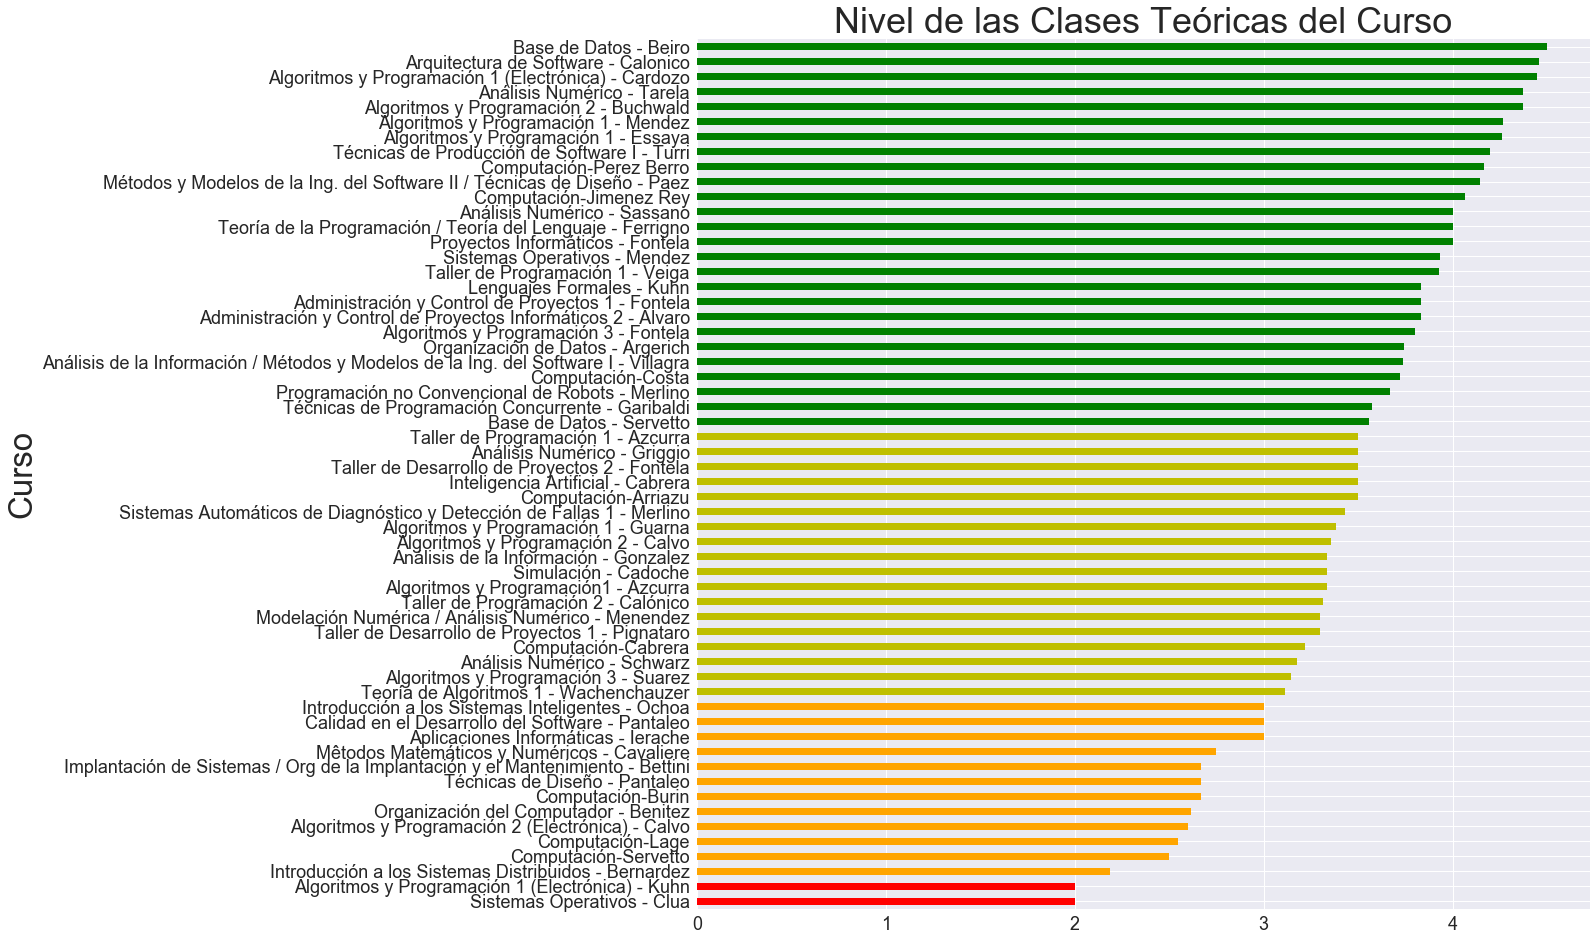

In [169]:
VARIABLE = 'Nivel de las Clases Teóricas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Nivel de las Clases Prácticas del Curso

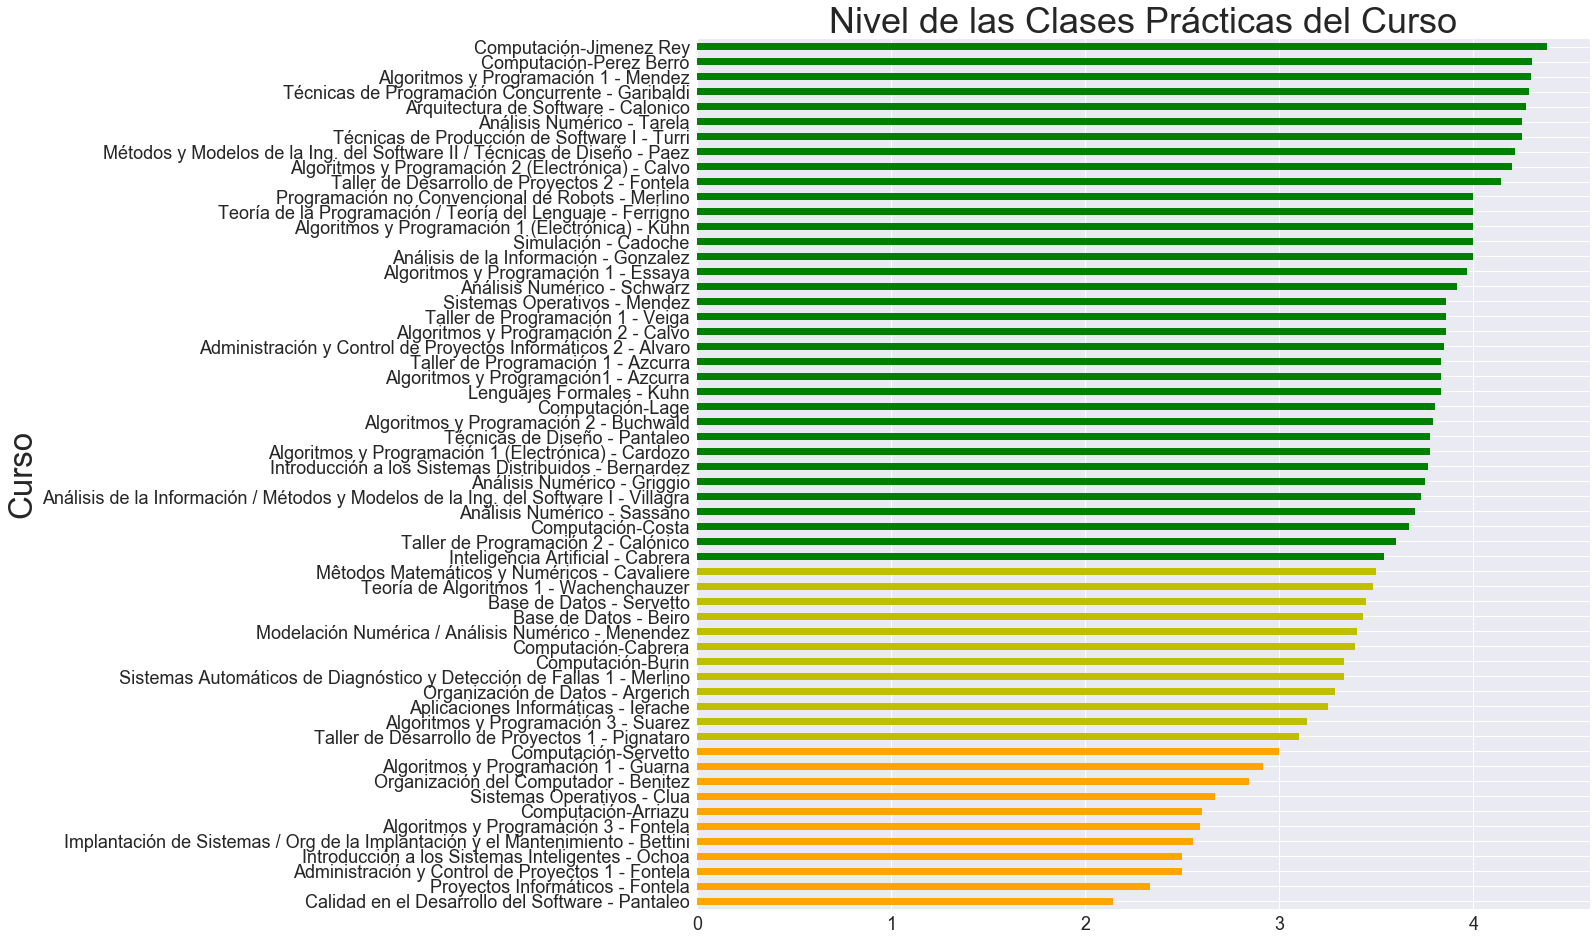

In [170]:
VARIABLE = 'Nivel de las Clases Prácticas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Nivel de las Clases (Promedio de Teóricas y Prácticas)

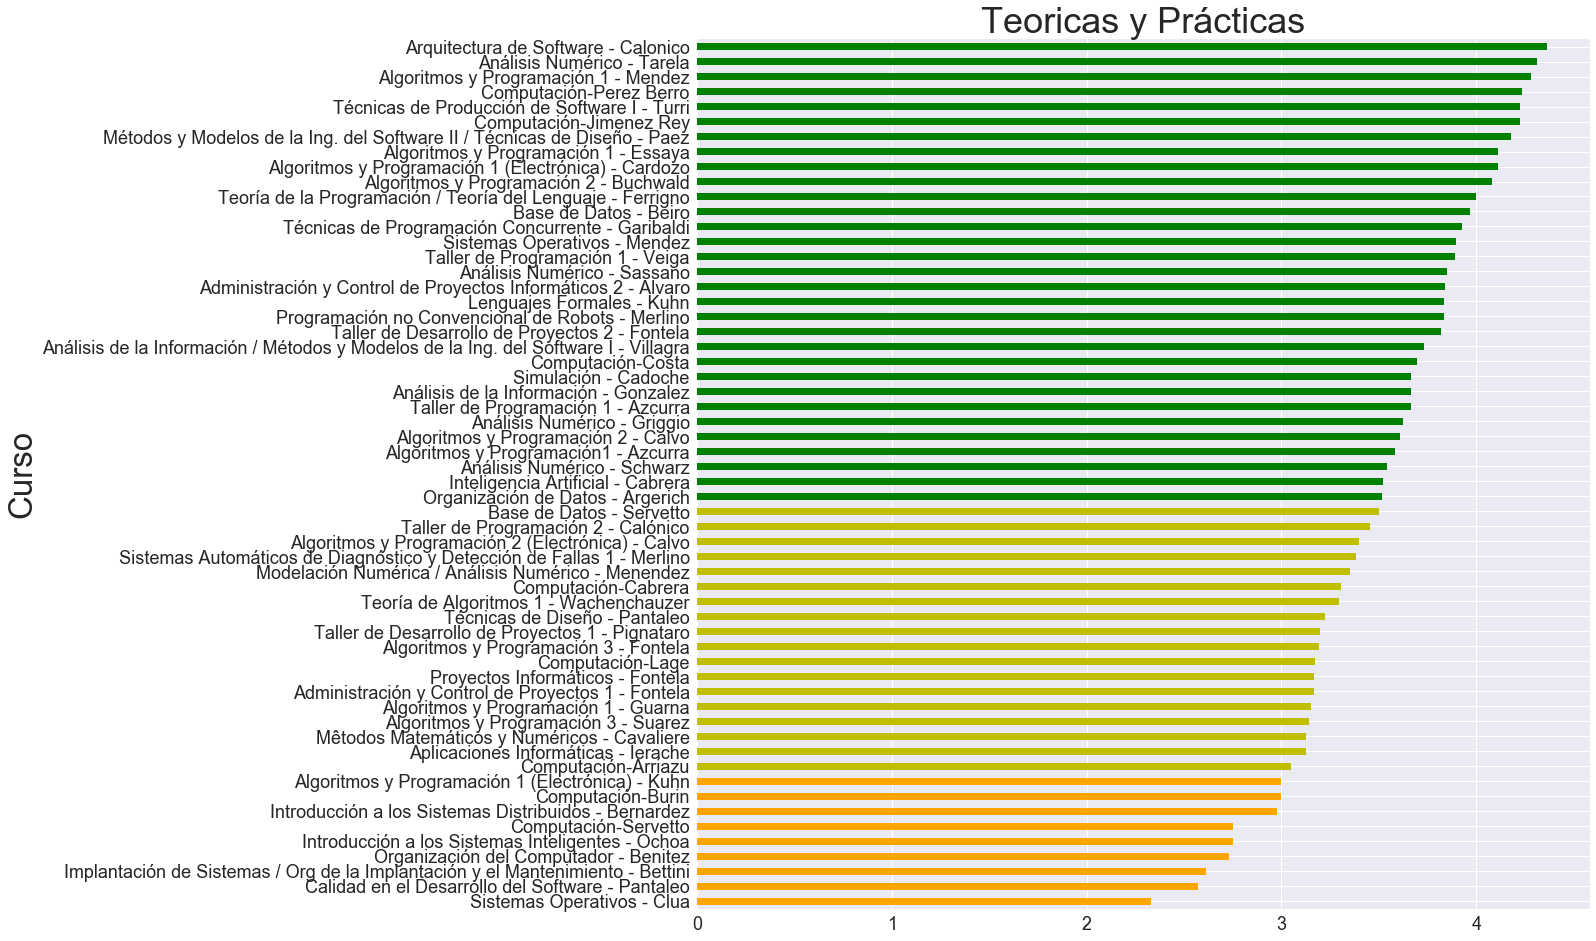

In [171]:
g_mean['Teoricas y Prácticas'] = (g_mean['Nivel de las Clases Prácticas del Curso'] + g_mean['Nivel de las Clases Teóricas del Curso'])/2
VARIABLE = 'Teoricas y Prácticas'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Dificultad del Curso

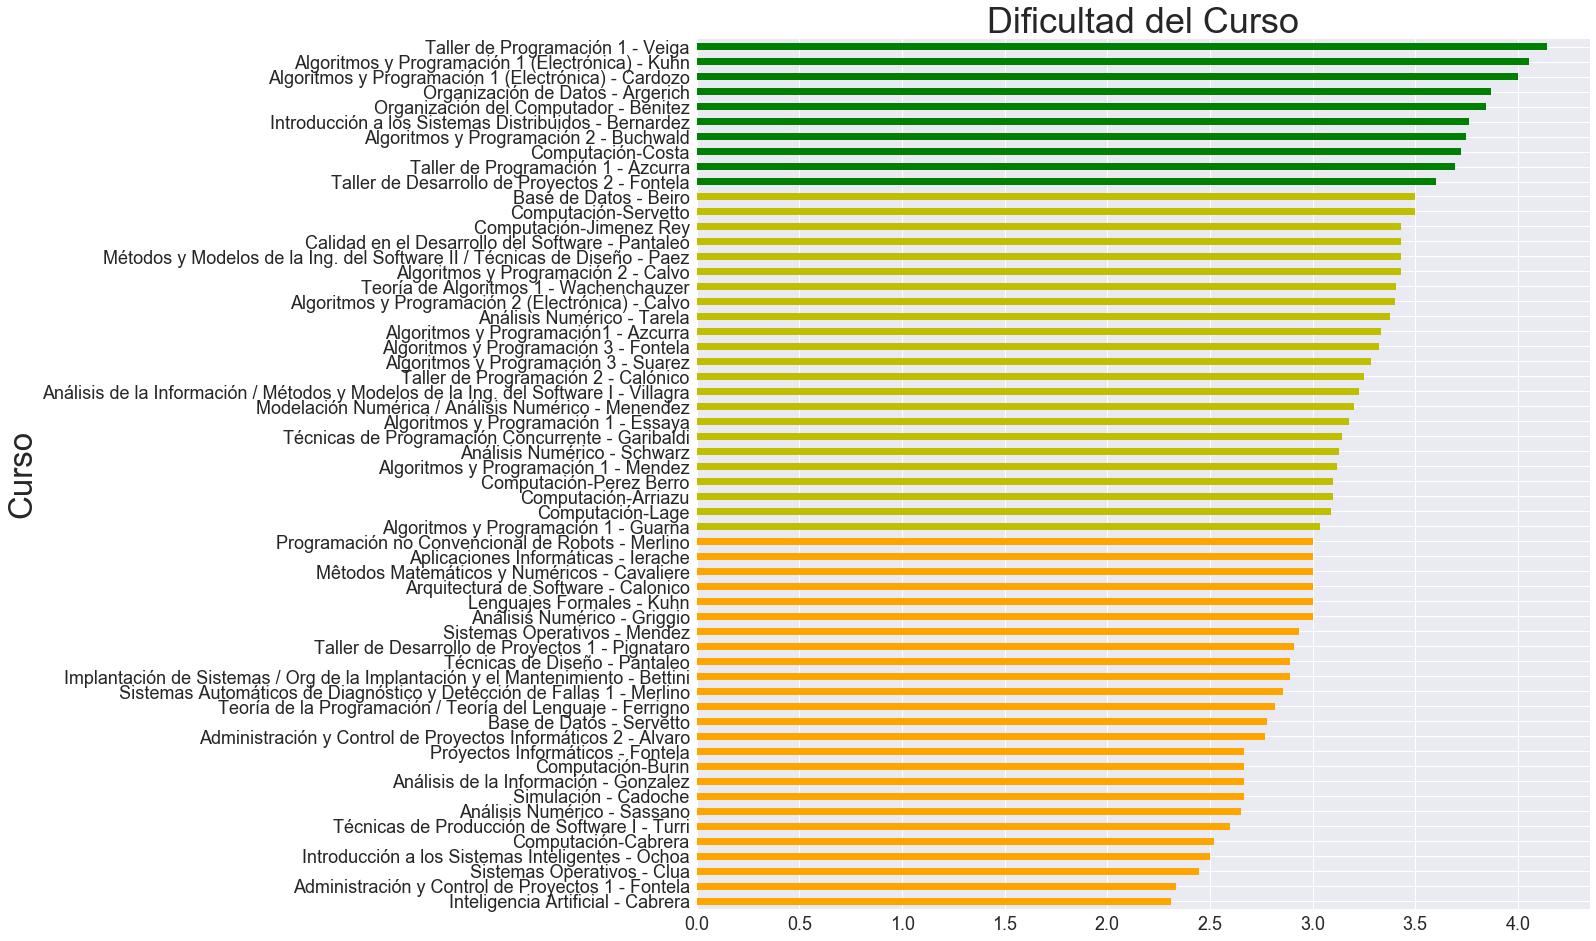

In [172]:
VARIABLE = 'Dificultad del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Relación entre Opinión Sobre el Curso y Dificultad

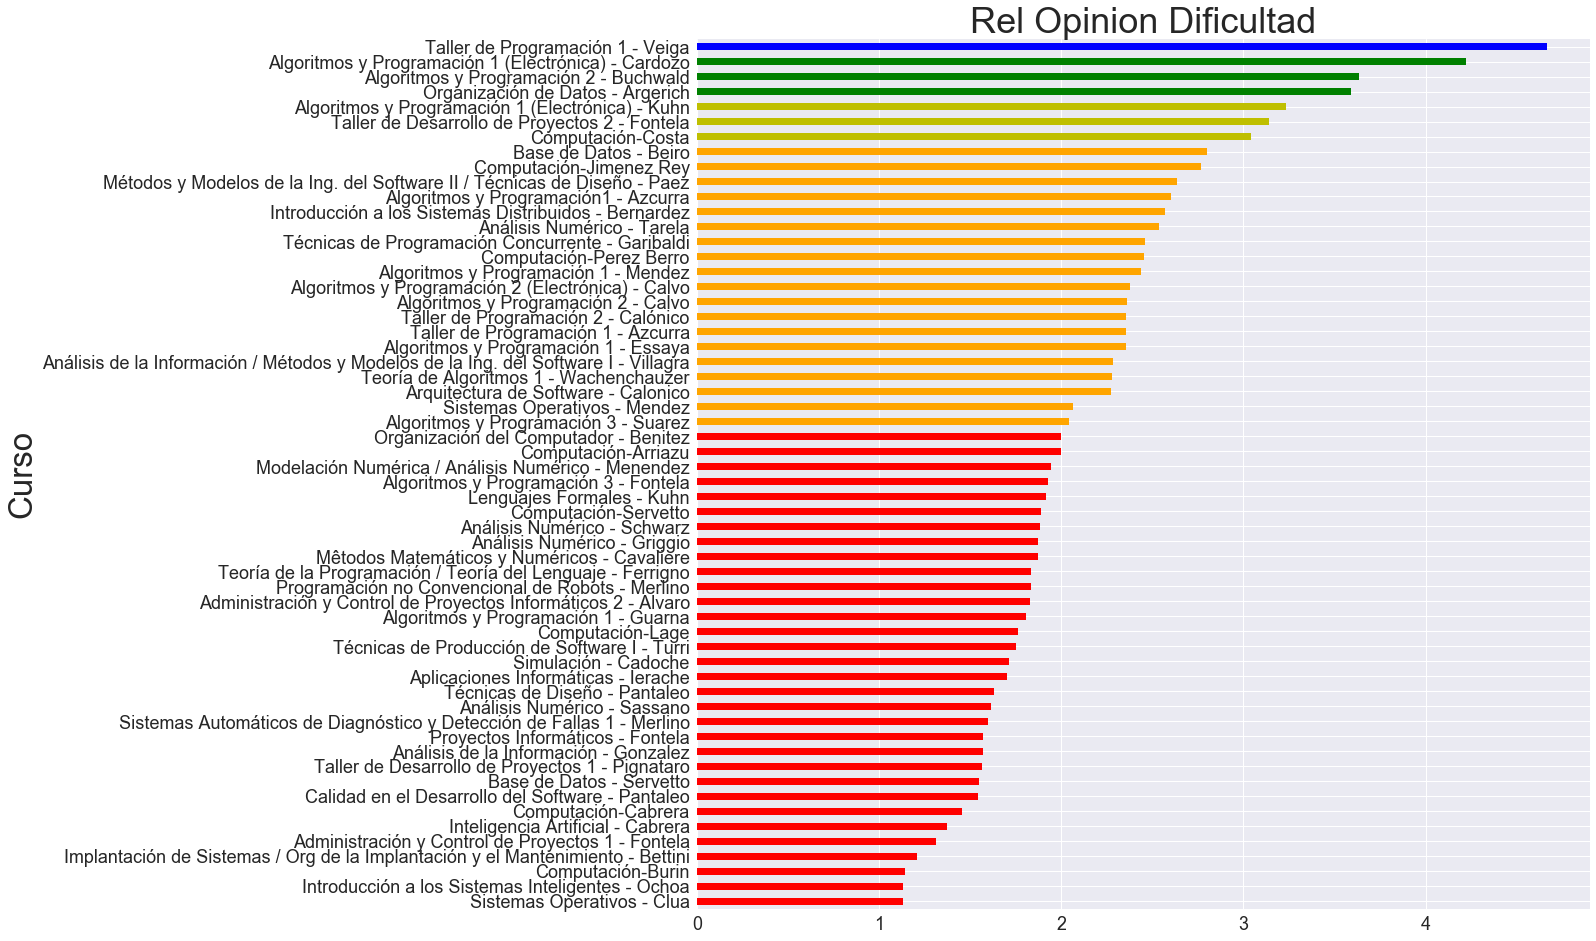

In [173]:
g_mean['Rel Opinion Dificultad'] = (g_mean['Opinión General Sobre el Curso']/(5-g_mean['Dificultad del Curso'])).sort_values()
VARIABLE = 'Rel Opinion Dificultad'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST).fillna('g')
g_mean[VARIABLE].plot(kind='barh',color = colors, figsize=(16,16),fontsize=18,title=VARIABLE);

## Correlacion Entre Variables

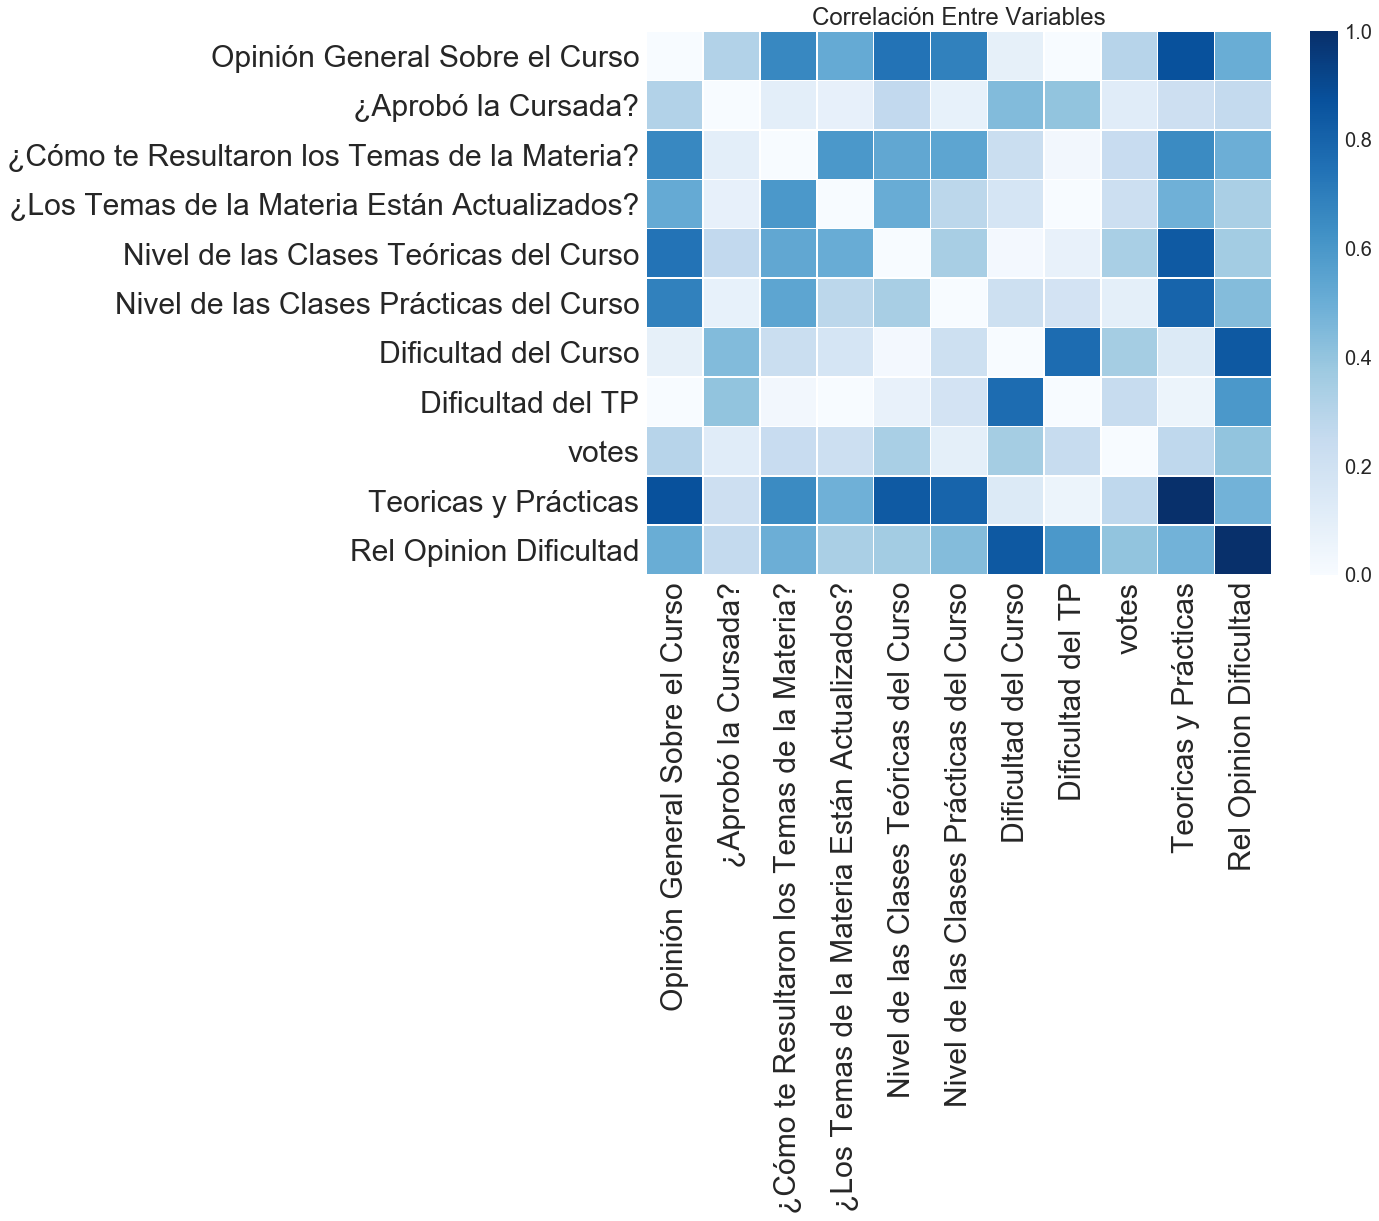

In [174]:
cor = g_mean.corr()
cor.values[[np.arange(9)]*2] = 0
cor.drop('votes',axis=1)
fig, ax = plt.subplots(figsize=(14,10))         # Sample f"igsize in inches
sns.set(font_scale=2)
sns.heatmap(cor.applymap(abs),annot=False, linewidths=.5,cmap='Blues',  ax=ax);
plt.title('Correlación Entre Variables');

## Diferencia Entre Nivel de Clases Teóricas y Prácticas
Hacia la derecha: Las clases teóricas son mejores que las prácticas.
Hacia la izquierda: Las clases prácticas son mejores que las teóricas.
En el centro: Poca o Ninguna diferencia.

In [175]:
g_mean['dif_teo_prac'] = ((g_mean['Nivel de las Clases Teóricas del Curso']-(g_mean['Nivel de las Clases Prácticas del Curso'])))

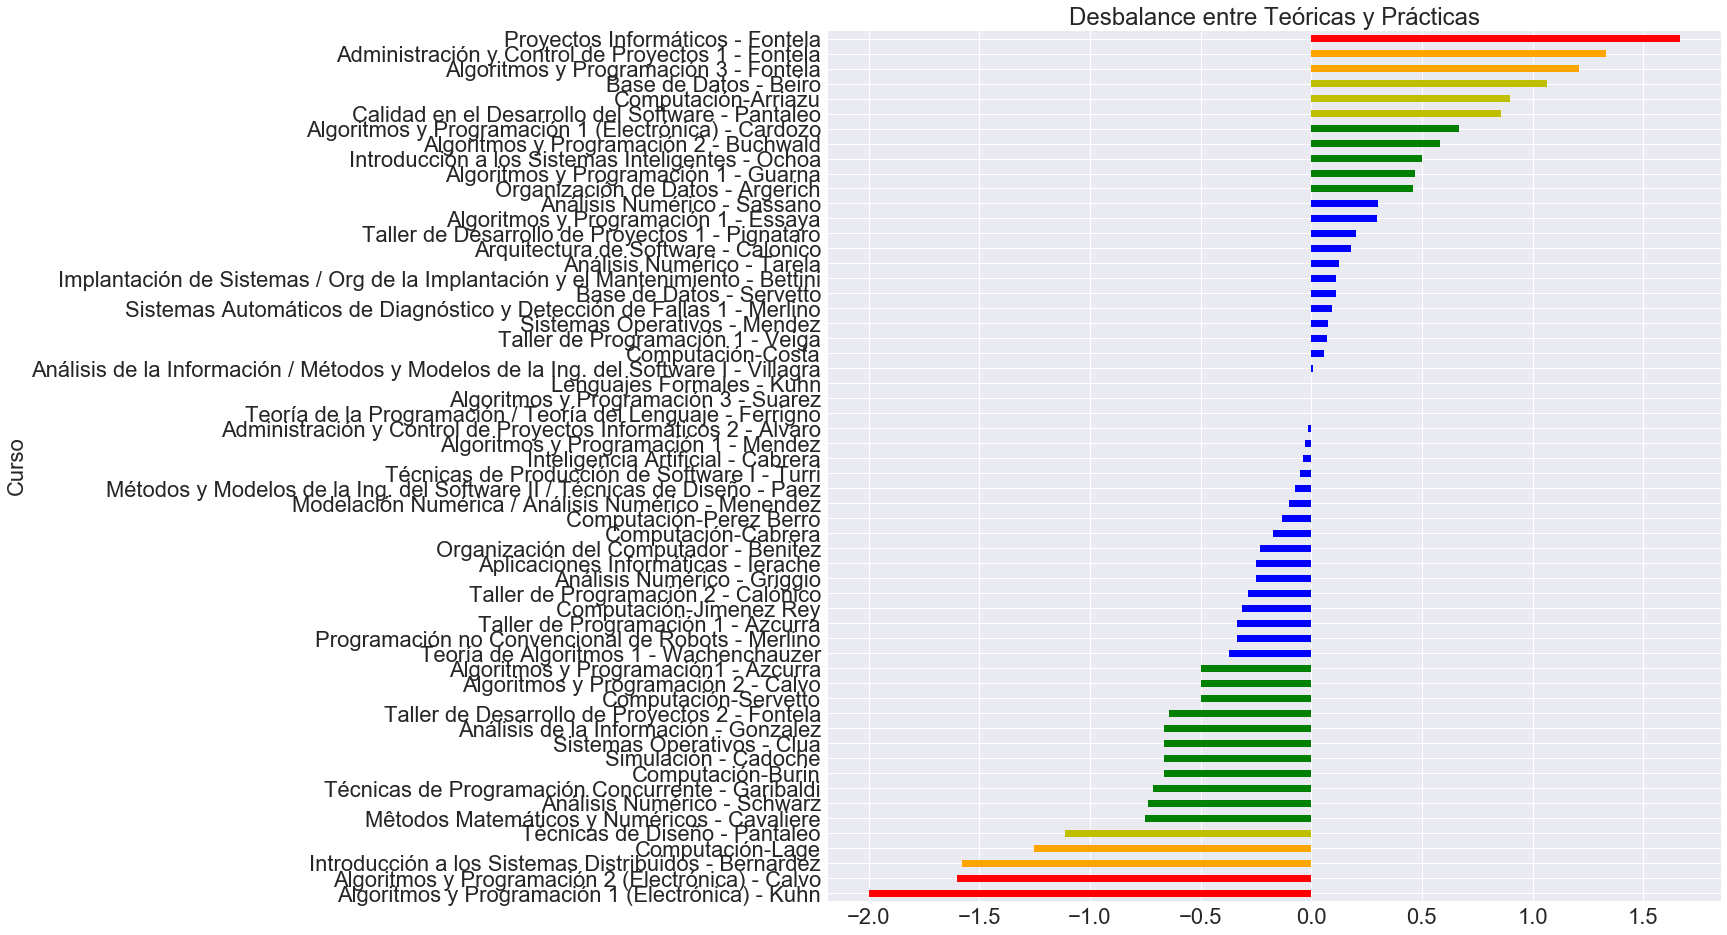

In [176]:
VARIABLE = 'dif_teo_prac'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(-abs(g_mean[VARIABLE]),5,labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title='Desbalance entre Teóricas y Prácticas');

## Promedio General por Curso

In [177]:
g_mean['general_ave'] = (g_mean['Opinión General Sobre el Curso']+g_mean['¿Cómo te Resultaron los Temas de la Materia?']+g_mean['¿Los Temas de la Materia Están Actualizados?']+g_mean['Nivel de las Clases Teóricas del Curso']+g_mean['Nivel de las Clases Prácticas del Curso']+g_mean['Dificultad del Curso'])/6

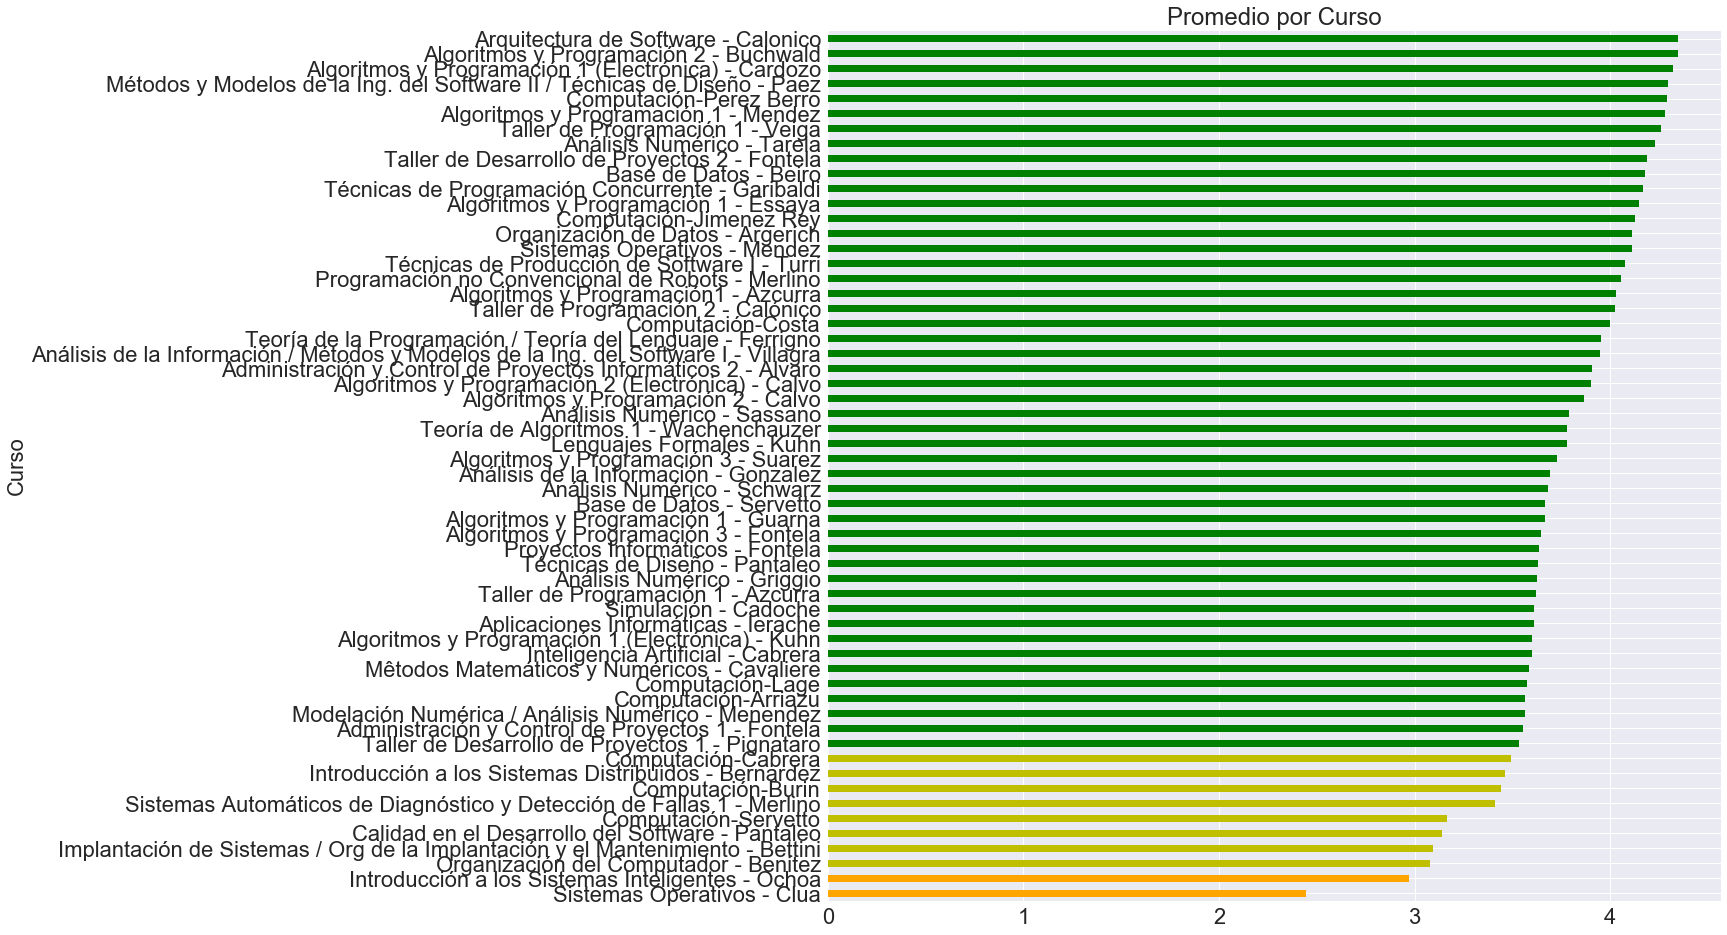

In [178]:
VARIABLE = 'general_ave'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title="Promedio por Curso");

# Comentarios por Curso

In [179]:
pd.set_option('max_colwidth',-1)
pd.set_option('max_r',999)
comp[['Curso','Comentarios Sobre el Curso']].sort_values(by = 'Curso').dropna()

Curso  \
681  Administración y Control de Proyectos 1 - Fontela                                     
560  Administración y Control de Proyectos 1 - Fontela                                     
821  Administración y Control de Proyectos 1 - Fontela                                     
621  Administración y Control de Proyectos 1 - Fontela                                     
146  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
810  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
753  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
763  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
502  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
775  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
554  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
216  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
215  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
330  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
228  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
267  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
731  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
265  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
425  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
488  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
386  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
647  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
416  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
338  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
526  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
339  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
340  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
88   Algoritmos y Programación 1 - Essaya                                                  
683  Algoritmos y Programación 1 - Essaya                                                  
29   Algoritmos y Programación 1 - Essaya                                                  
289  Algoritmos y Programación 1 - Essaya                                                  
780  Algoritmos y Programación 1 - Essaya                                                  
62   Algoritmos y Programación 1 - Essaya                                                  
12   Algoritmos y Programación 1 - Essaya                                                  
578  Algoritmos y Programación 1 - Guarna                                                  
585  Algoritmos y Programación 1 - Guarna                                                  
229  Algoritmos y Programación 1 - Guarna                                                  
166  Algoritmos y Programación 1 - Guarna                                                  
160  Algoritmos y Programación 1 - Guarna                                                  
238  Algoritmos y Programación 1 - Guarna                                                  
639  Algoritmos y Programación 1 - Guarna                                                  
96   Algoritmos y Programación 1 - Guarna                                                  
260  Algoritmos y Programación 1 - Guarna                                                  
78   Algoritmos y Programación 1 - 

In [180]:
comp.columns

Index(['Timestamp', 'Curso', 'Opinión General Sobre el Curso',
       '¿Aprobó la Cursada?', '¿Cómo te Resultaron los Temas de la Materia?',
       '¿Los Temas de la Materia Están Actualizados?',
       'Nivel de las Clases Teóricas del Curso',
       'Nivel de las Clases Prácticas del Curso', 'Dificultad del Curso',
       'Dificultad del TP', 'Comentarios Sobre el Curso'],
      dtype='object')

In [181]:
comp['¿Aprobó la Cursada?'] = (comp['¿Aprobó la Cursada?'] == 5)

In [182]:
comp['¿Los Temas de la Materia Están Actualizados?'] = (comp['¿Los Temas de la Materia Están Actualizados?'] == 5)

In [183]:
lista_cursos = list(comp.groupby('Curso').size().sort_values(ascending=False).keys())

# Resultados curso por curso

In [184]:
# Por curso

for curso in lista_cursos:
    chunk = comp[comp['Curso'] == curso]
    print(curso)
    print("Num votes:",len(chunk))
    print("Opinion General:",round(chunk['Opinión General Sobre el Curso'].mean(),2))
    print("Nivel de las Clases Teóricas del Curso:",round(chunk['Nivel de las Clases Teóricas del Curso'].mean(),2))
    print("Nivel de las Clases Prácticas del Curso:",round(chunk['Nivel de las Clases Prácticas del Curso'].mean(),2))
    print("Dificultad del Curso:",round(chunk['Dificultad del Curso'].mean(),2))
    print("Dificultad del TP:",round(chunk['Dificultad del TP'].mean(),2))
    print("¿Cómo te Resultaron los Temas de la Materia?:",round(chunk['¿Cómo te Resultaron los Temas de la Materia?'].mean(),2))
    print("¿Los Temas de la Materia Están Actualizados?:",round(chunk['¿Los Temas de la Materia Están Actualizados?'].mean(),2))    
    print("Aprobo la cursada:",round(chunk['¿Aprobó la Cursada?'].mean(),2))
    print("----------------------")

Algoritmos y Programación 3 - Fontela
Num votes: 40
Opinion General: 3.23
Nivel de las Clases Teóricas del Curso: 3.8
Nivel de las Clases Prácticas del Curso: 2.59
Dificultad del Curso: 3.33
Dificultad del TP: 4.0
¿Cómo te Resultaron los Temas de la Materia?: 4.22
¿Los Temas de la Materia Están Actualizados?: 0.92
Aprobo la cursada: 0.92
----------------------
Organización de Datos - Argerich
Num votes: 39
Opinion General: 4.05
Nivel de las Clases Teóricas del Curso: 3.74
Nivel de las Clases Prácticas del Curso: 3.29
Dificultad del Curso: 3.87
Dificultad del TP: 3.64
¿Cómo te Resultaron los Temas de la Materia?: 4.72
¿Los Temas de la Materia Están Actualizados?: 1.0
Aprobo la cursada: 0.85
----------------------
Algoritmos y Programación 1 - Mendez
Num votes: 34
Opinion General: 4.59
Nivel de las Clases Teóricas del Curso: 4.26
Nivel de las Clases Prácticas del Curso: 4.29
Dificultad del Curso: 3.12
Dificultad del TP: 3.68
¿Cómo te Resultaron los Temas de la Materia?: 4.65
¿Los Temas d

# Analisis Historico

In [185]:
comp_1 = pd.read_csv('encuesta.csv')
comp_2 = pd.read_csv('encuesta2.csv')
comp_3 = pd.read_csv('encuesta3.csv')
comp['cuatrimestre'] = 4
comp_1['cuatrimestre'] = 1
comp_2['cuatrimestre'] = 2
comp_3['cuatrimestre'] = 3

In [186]:
print(len(comp_1))
print(len(comp_2))
print(len(comp_3))
print(len(comp))

458
528
701
834


In [187]:
comp_1 = map_answers(comp_1)
comp_2 = map_answers(comp_2)
comp_3 = map_answers(comp_3)

In [188]:
grouped_1 = comp_1.groupby('Curso').mean()
grouped_2 = comp_2.groupby('Curso').mean()
grouped_3 = comp_3.groupby('Curso').mean()
grouped_4 = comp.groupby('Curso').mean()

In [189]:
all_data = pd.concat([grouped_1,grouped_2,grouped_3,grouped_4],axis=0)
grouped = all_data.sort_values('cuatrimestre').groupby('Curso')

In [190]:
for name,group in grouped:
    print(name)
    print("Opinión General Sobre el Curso",group['Opinión General Sobre el Curso'].values)
    print("Nivel de las Clases Teóricas del Curso",group['Nivel de las Clases Teóricas del Curso'].values)
    print("Nivel de las Clases Prácticas del Curso",group['Nivel de las Clases Prácticas del Curso'].values)
    print("--------------")

Administración y Control de Proyectos 1 - Fontela
Opinión General Sobre el Curso [ 3.4         3.91666667  3.66666667  3.5       ]
Nivel de las Clases Teóricas del Curso [ 4.          4.25        4.44444444  3.83333333]
Nivel de las Clases Prácticas del Curso [ 2.6  2.5  3.   2.5]
--------------
Administración y Control de Proyectos Informáticos 2 - Alvaro
Opinión General Sobre el Curso [ 4.          4.07692308]
Nivel de las Clases Teóricas del Curso [ 4.16666667  3.83333333]
Nivel de las Clases Prácticas del Curso [ 3.5         3.84615385]
--------------
Administración y Control de Proyectos Informáticos 2 - Gabardini
Opinión General Sobre el Curso [ 3.2  4. ]
Nivel de las Clases Teóricas del Curso [ 4.   3.5]
Nivel de las Clases Prácticas del Curso [ 4.   3.5]
--------------
Algoritmos y Programación 1 (Electrónica) - Cardozo
Opinión General Sobre el Curso [ 4.23529412  4.7         4.58823529  4.22222222]
Nivel de las Clases Teóricas del Curso [ 4.35294118  4.7         4.52941176  4.